In [27]:
import numpy as np

import subprocess
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
def saveplot(path:str, title:str, xname:str, yname:str, ax) -> None:
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='silver')
    plt.subplots_adjust(bottom=0.15)
    plt.xlabel(xname) 
    plt.ylabel(yname)
    plt.title(title)
    plt.legend()
    plt.savefig(f"{path}.eps", format='eps')
    plt.savefig(f"{path}.png", format='png')

In [49]:
# arguments
benchmark_binary = "../build/benchmarks"

tries = ["array", "ternary", "custom"]

filespath="../resources/geschud/"
files = [(filespath + filepath, os.stat(filespath + filepath).st_size) for filepath in os.listdir(filespath)]
files.sort(key=lambda x:(x[1], x[0]))

operations = ["add", "search", "remove", "mix"]


# Time

In [51]:
# Run benchmarks
results = []
for trie in tries:
    oper_results = []
    for i_oper, oper in enumerate(operations):
        file_results = []
        for (filename, filelen) in files:
            result = 0.0
            args = [benchmark_binary, f"{trie}", f"{filename}", f"{i_oper + 1}"]
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()
            result += float(popen.stdout.read())
            print(f"{trie:12} {oper:12} {filename:60} {result/10e9:20}")
            file_results.append((filename, filelen, result))
        oper_results.append((oper, file_results))
    results.append((trie, oper_results))

print(results)

array        add          ../resources/geschud/geschud_piepklein.g6                            0.0001206266
array        add          ../resources/geschud/geschud_klein.g6                                0.0009919124
array        add          ../resources/geschud/geschud_middelmaat.g6                          0.01298408275
array        add          ../resources/geschud/geschud_groot.g6                                0.5309568413
array        add          ../resources/geschud/geschud_heelgroot.g6                            1.5227804855
array        add          ../resources/geschud/geschud.g6                                      3.0137912437
array        search       ../resources/geschud/geschud_piepklein.g6                             1.95636e-05
array        search       ../resources/geschud/geschud_klein.g6                               0.00039730295
array        search       ../resources/geschud/geschud_middelmaat.g6                          0.00811440375
array        search       ..

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


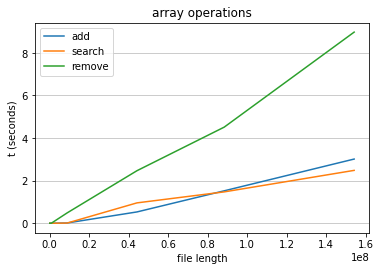

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


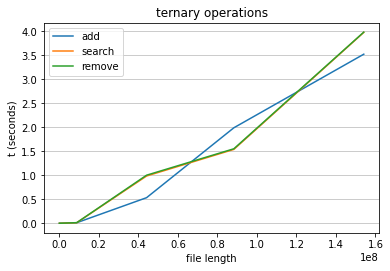

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


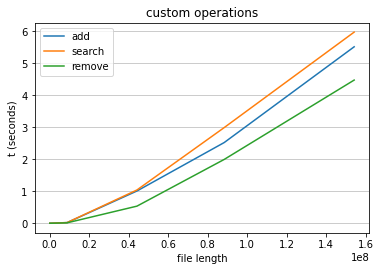

In [52]:
# plot operations per trie

for trie, trie_results in results:
    fig,ax = plt.subplots()
    for oper,oper_result in trie_results[:3]:
        n,x,y = [np.array(e) for e in list(zip(*(oper_result)))]
        y = y/10e9
        plt.plot(x, y, label=f"{oper}")
    saveplot(f"images/{trie}_all", f"{trie} operations", "file length", "t (seconds)", ax)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


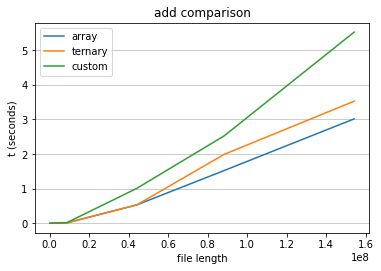

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


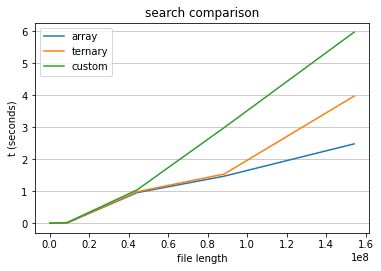

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


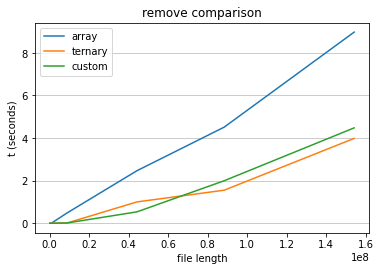

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


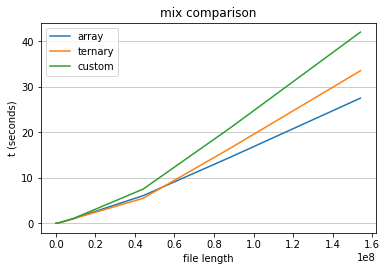

In [53]:
# plot tries per operation 

for i_oper, oper in enumerate(operations):
    fig,ax = plt.subplots()
    for trie, trie_results in results:
        data = trie_results[i_oper][1]
        n,x,y = [np.array(e) for e in list(zip(*(data)))]
        y = y/10e9
        plt.plot(x, y, label=f"{trie}")
    saveplot(f"images/{oper}_comparison", f"{oper} comparison", "file length", "t (seconds)", ax)
    plt.show()

In [41]:
# Run benchmarks
words_results = []
for trie in tries:
    oper_results = []
    for i_oper, oper in enumerate(operations):
        args = [benchmark_binary, f"{trie}", "../resources/other/words_shuffled.txt", f"{i_oper + 1}"]
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()
        result = int(popen.stdout.read())
        print(f"{trie:12} {oper:12} ../resources/other/words_shuffled.txt   {result/10e9:20}")
        oper_results.append((oper, result))
    words_results.append((trie, oper_results))

print(words_results)

array        add          ../resources/other/words_shuffled.txt           0.0919697827
array        search       ../resources/other/words_shuffled.txt           0.0283907538
array        remove       ../resources/other/words_shuffled.txt           1.9401159962
array        mix          ../resources/other/words_shuffled.txt           4.0488569234
ternary      add          ../resources/other/words_shuffled.txt            0.032978614
ternary      search       ../resources/other/words_shuffled.txt           0.0290783596
ternary      remove       ../resources/other/words_shuffled.txt           0.0320314994
ternary      mix          ../resources/other/words_shuffled.txt           2.0418207905
custom       add          ../resources/other/words_shuffled.txt           0.0585842027
custom       search       ../resources/other/words_shuffled.txt           0.9597068015
custom       remove       ../resources/other/words_shuffled.txt           0.0395444828
custom       mix          ../resources/othe

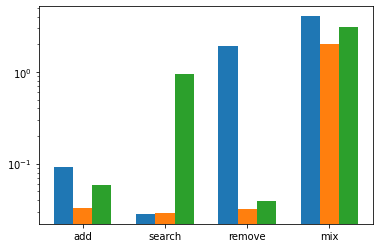

In [78]:
width = 0.7/len(words_results)
xaxis = np.arange(4) 

fig,ax = plt.subplots()
for i, (trie, trie_results) in enumerate(words_results):
    o,y = [np.array(e) for e in list(zip(*(trie_results)))]
    plt.bar(xaxis + i*width - width, y/10e9, width=width, label=f"{trie}")
plt.xticks(xaxis, operations)
plt.yscale('log')

In [55]:
# Run benchmarks
reoccuring_results = []
for trie in tries:
    file_results = []
    for (filename, filelen) in files:
        args = [benchmark_binary, f"{trie}", f"{filename}", "5"]
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()
        result = float(popen.stdout.read())
        print(f"{trie:12}   5   {filename:60} {filelen:21}  {result/10e9:20}")
        file_results.append((filename, filelen, result))
    reoccuring_results.append((trie, file_results))

print(reoccuring_results)

array          5   ../resources/geschud/geschud_piepklein.g6                                    87997          0.0001092052
array          5   ../resources/geschud/geschud_klein.g6                                       882877         0.00189339865
array          5   ../resources/geschud/geschud_middelmaat.g6                                 8848913          0.0247392285
array          5   ../resources/geschud/geschud_groot.g6                                     44182717         0.99853789065
array          5   ../resources/geschud/geschud_heelgroot.g6                                 88348067         1.55544220375
array          5   ../resources/geschud/geschud.g6                                          154089149         3.02290315265
ternary        5   ../resources/geschud/geschud_piepklein.g6                                    87997          3.579495e-05
ternary        5   ../resources/geschud/geschud_klein.g6                                       882877         0.00077623055
ternary 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


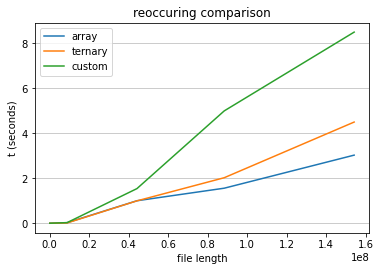

In [56]:
fig,ax = plt.subplots()
for trie, trie_results in reoccuring_results:
    n,x,y = [np.array(e) for e in list(zip(*(trie_results)))]
    y = y/10e9
    plt.plot(x, y, label=f"{trie}")
saveplot(f"images/reoccuring_comparison", f"reoccuring comparison", "file length", "t (seconds)", ax)
plt.show()

# Memory

In [20]:
# Run benchmarks
results = []
for trie in tries:
    file_results = []
    for (filename, filelen) in files:
        cmd = f"valgrind -q --tool=massif --stacks=yes --massif-out-file=temp.ms -- {benchmark_binary} {trie} {filename} 1"
        ps = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE)
        ps.wait()
        valgrind_result = ps.stdout.read()

        cmd = "cat temp.ms  | grep -B 3 peak | head -n 1 | sed \"s/[^0-9]//g\""
        ps = subprocess.Popen(cmd,shell=True,stdout=subprocess.PIPE)
        ps.wait()
        output = ps.communicate()[0]

        result = int(output)
        print(f"{trie:12} {filename:60} {result/10e6:20}")
        file_results.append((filename, filelen, result))
    results.append((trie, file_results))

print(results)

array        ../resources/geschud/geschud_piepklein.g6                               0.1902799
array        ../resources/geschud/geschud_klein.g6                                   1.8823093
array        ../resources/geschud/geschud_middelmaat.g6                             19.2523202
array        ../resources/geschud/geschud_groot.g6                                  93.0444565
array        ../resources/geschud/geschud_heelgroot.g6                             185.9565617
array        ../resources/geschud/geschud.g6                                       320.9240827
ternary      ../resources/geschud/geschud_piepklein.g6                               0.0426288
ternary      ../resources/geschud/geschud_klein.g6                                   0.4436865
ternary      ../resources/geschud/geschud_middelmaat.g6                              4.0552105
ternary      ../resources/geschud/geschud_groot.g6                                  17.4197946
ternary      ../resources/geschud/geschud_heelgroo